<a href="https://colab.research.google.com/github/iamfaham/students-studying-abroad/blob/main/students_studying_abroad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("student_data.csv")

# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop if necessary
df.fillna(0, inplace=True)
df = df.dropna(subset=['Code'])

index                                                     0
Region of Country                                         0
Code                                                    408
Year                                                      0
Outbound mobility ratio, all regions, both sexes (%)      0
dtype: int64


In [ ]:
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df["Code"] = df["Code"].str.upper()  # Ensure all codes are in uppercase

In [ ]:
yearly_avg = df.groupby("Year")["Outbound mobility ratio, all regions, both sexes (%)"].mean().reset_index()
top_regions = df.groupby("Region of Country")["Outbound mobility ratio, all regions, both sexes (%)"].mean().nlargest(5)
bottom_regions = df.groupby("Region of Country")["Outbound mobility ratio, all regions, both sexes (%)"].mean().nsmallest(5)

print("Top 5 Regions:\n", top_regions)
print("Bottom 5 Regions:\n", bottom_regions)


Top 5 Regions:
 Region of Country
Turks and Caicos Islands    8515.000000
Maldives                     584.619528
Seychelles                   295.411296
Andorra                      258.880684
Tonga                        213.752295
Name: Outbound mobility ratio, all regions, both sexes (%), dtype: float64
Bottom 5 Regions:
 Region of Country
United States    0.306425
Philippines      0.318703
Argentina        0.379862
Russia           0.493538
Brazil           0.494387
Name: Outbound mobility ratio, all regions, both sexes (%), dtype: float64


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(yearly_avg["Outbound mobility ratio, all regions, both sexes (%)"], trend="add", seasonal="add", seasonal_periods=5)
forecast = model.fit().forecast(5)

print("Predicted Mobility Ratio for Next 5 Years:\n", forecast)


Predicted Mobility Ratio for Next 5 Years:
 17    21.462665
18    31.150645
19    20.195885
20    19.153202
21    43.648122
dtype: float64


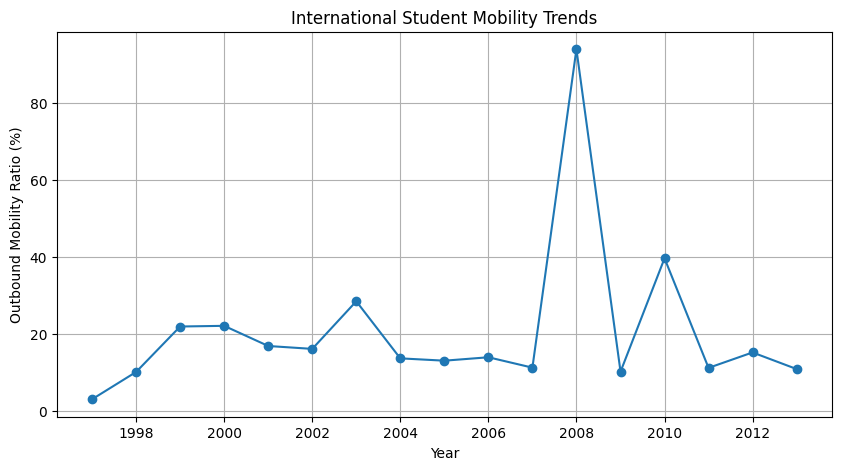

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["Outbound mobility ratio, all regions, both sexes (%)"], marker='o')
plt.xlabel("Year")
plt.ylabel("Outbound Mobility Ratio (%)")
plt.title("International Student Mobility Trends")
plt.grid()
plt.show()


In [ ]:

df.to_csv("updated_student_data.csv", index=False)
